In [11]:
import os
from fidelity_simulation import FidelitySimulation
from pulse import RectangularReadoutPulse
from fidelity_analysis.utils import setup_plotting
import numpy as np
setup_plotting(dpi=100)

In [23]:
a = np.array([np.array([1, 2])])
a[0][0]

np.int64(1)

In [7]:
current_path = os.path.abspath("")
data_dir_path = os.path.join(current_path, "data")
images_dir_path = os.path.join(current_path, "images")

In [8]:
# s_parameters_file_state_1 = os.path.join(
#     data_dir_path,
#     "data_00000_1_ghz.s2p",
# )
# s_parameters_file_state_0 = os.path.join(
#     data_dir_path,
#     "data_00000_0_ghz.s2p"
# )
#
# fr0_meas = 6.065852884e9
# fr1_meas = 6.064931745e9
# pulse_frequency = (fr0_meas + fr1_meas) / 2

In [9]:
from fidelity_analysis.utils import S2pUtils

fr0_meas = 7.252456e9
fr1_meas = 7.252612e9
pulse_frequency = (fr0_meas + fr1_meas) / 2

Q = 48e3

s_parameters_file_state_0 = S2pUtils.create_resonator_S21(fr0_meas, Q, Q)
s_parameters_file_state_1 = S2pUtils.create_resonator_S21(fr1_meas, Q, Q)

/Users/user/PycharmProjects/qubit_readout_simulation/fidelity_analysis/pulse.py:217: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


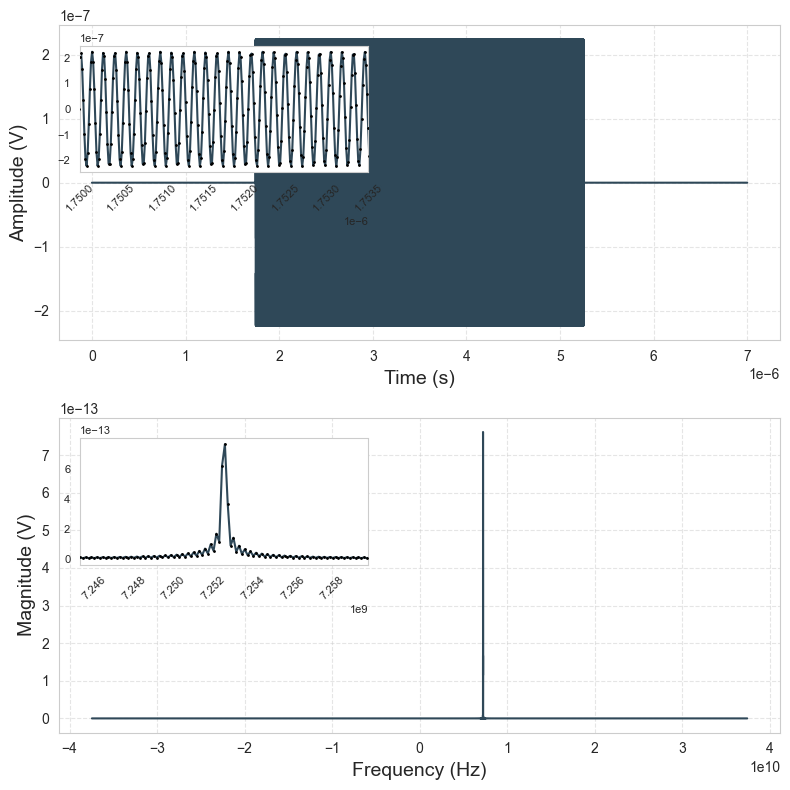

100%|██████████| 1000/1000 [00:11<00:00, 88.31it/s, Transited Pulse $|1\rangle$]


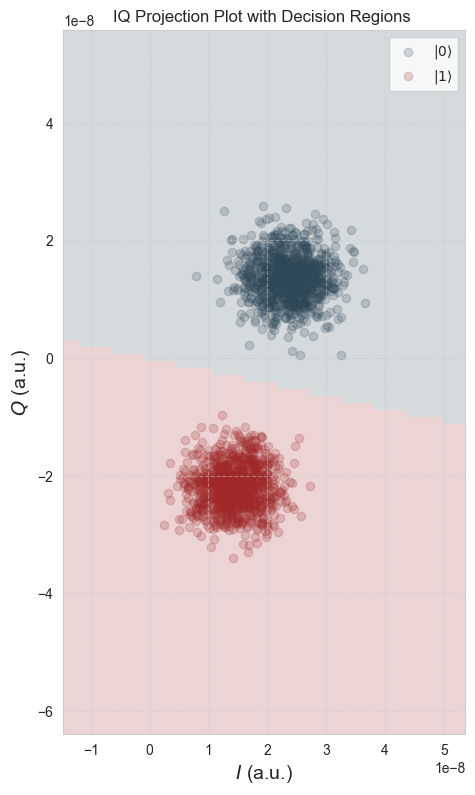

fidelity = 1.0


In [10]:
pulse_samples_number = 2 ** 19

pulse_length = 3.5 * 10 ** (-6)

rect_readout_pulse = RectangularReadoutPulse(
    carrier_frequency=pulse_frequency,
    pulse_duration=pulse_length,
    pulse_power_dbm=-123,
    total_signal_time=2 * pulse_length,
    pulse_samples_number=pulse_samples_number,
)

rect_readout_pulse.plot_pulse(path_for_images=images_dir_path)

fidelity_simulation = FidelitySimulation(
    s_parameters_file_state_0=s_parameters_file_state_0,
    s_parameters_file_state_1=s_parameters_file_state_1,
    readout_pulse=rect_readout_pulse,
    IQ_projection_frequency=pulse_frequency + 200e6,
    num_iterations=1000,
    readout_dt=1e-9,
    plot_pulses=False,
    plot_result=True,
    disable_progress_bar=False,
    path_for_images=images_dir_path,
)

fidelity = fidelity_simulation.run()

print("fidelity =", fidelity)